# Алгоритмы снижения размерности данных

- Линейные методы

- Нелинейные методы

## Линейные методы:

### - Метод главных компонент (principal Component Analysis)

### - Факторный анализ (factor analysis)

### - Линейный дискриминатный анализ (linear discriminant analysis)

### Сингулярное разложение (singular value decomposition)

## Нелинейные методы:

### Ядерный метод главных компонент (kernel principal component analysis)

### Стохастическое вложение соседей с t-распределением (t-SNE)

### Многомерное шкалирование (multidimensional scaling)

### Изометрическое отображение (isometric mapping)

In [4]:
%matplotlib inline 
import pandas as pd 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np 
import seaborn as sns 
from sklearn import datasets 
from sklearn.decomposition import PCA, KernelPCA 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.decomposition import FactorAnalysis 
from sklearn.manifold import TSNE, MDS, Isomap 
from sklearn.preprocessing import StandardScaler

C:\Anaconda\anaconda\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


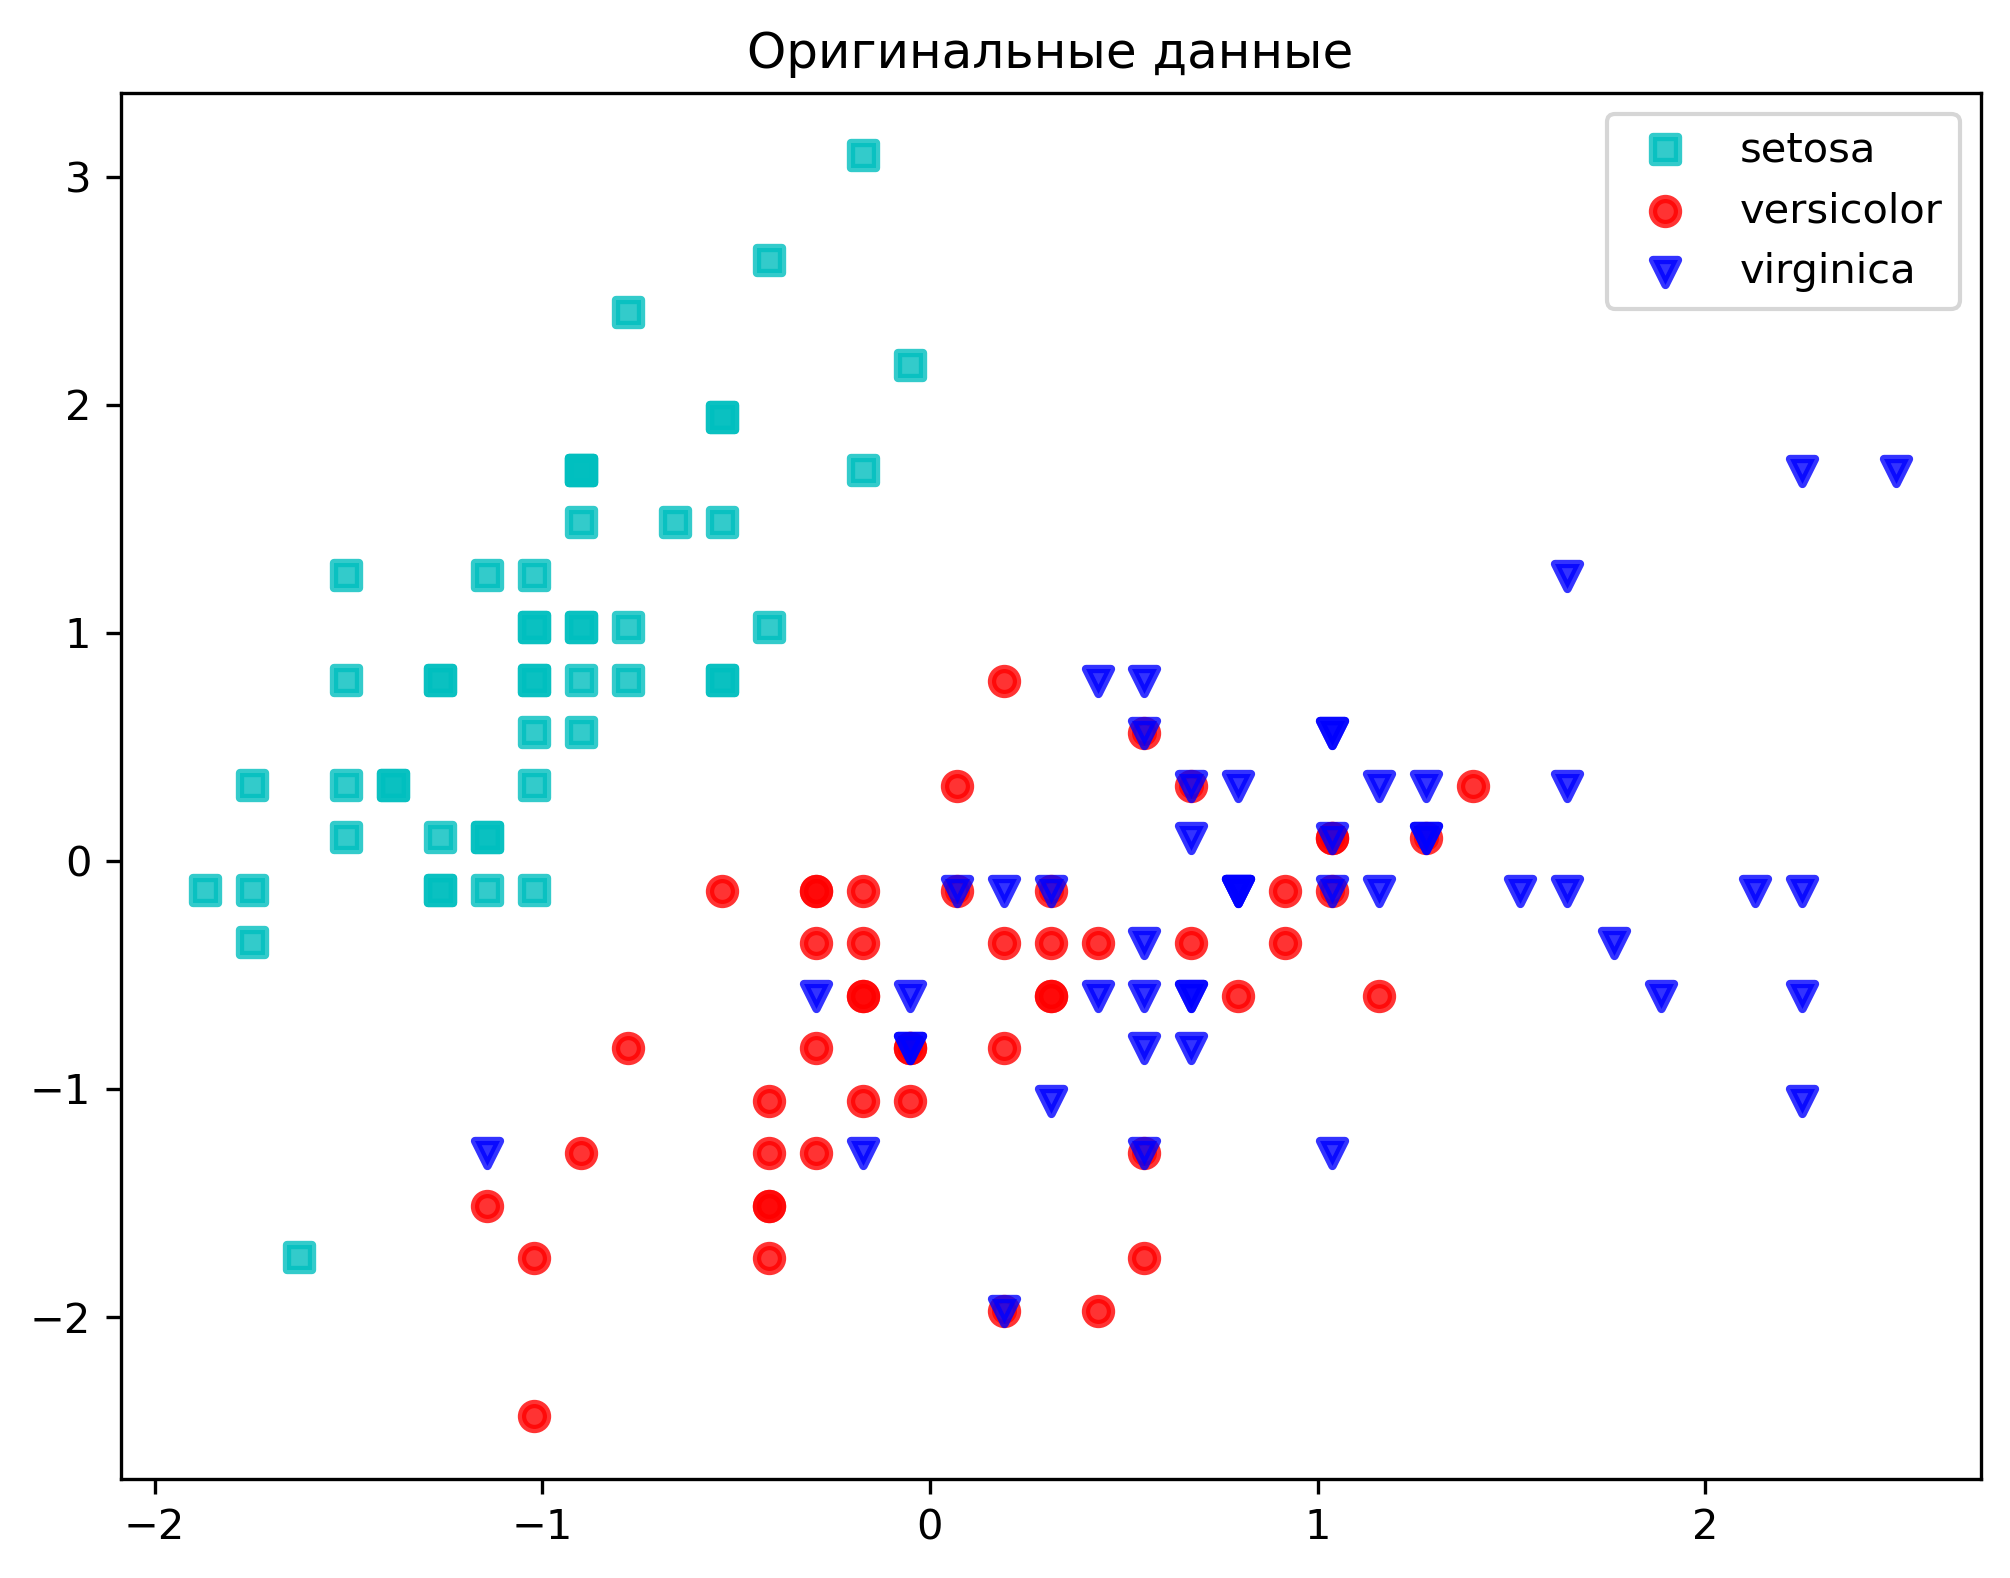

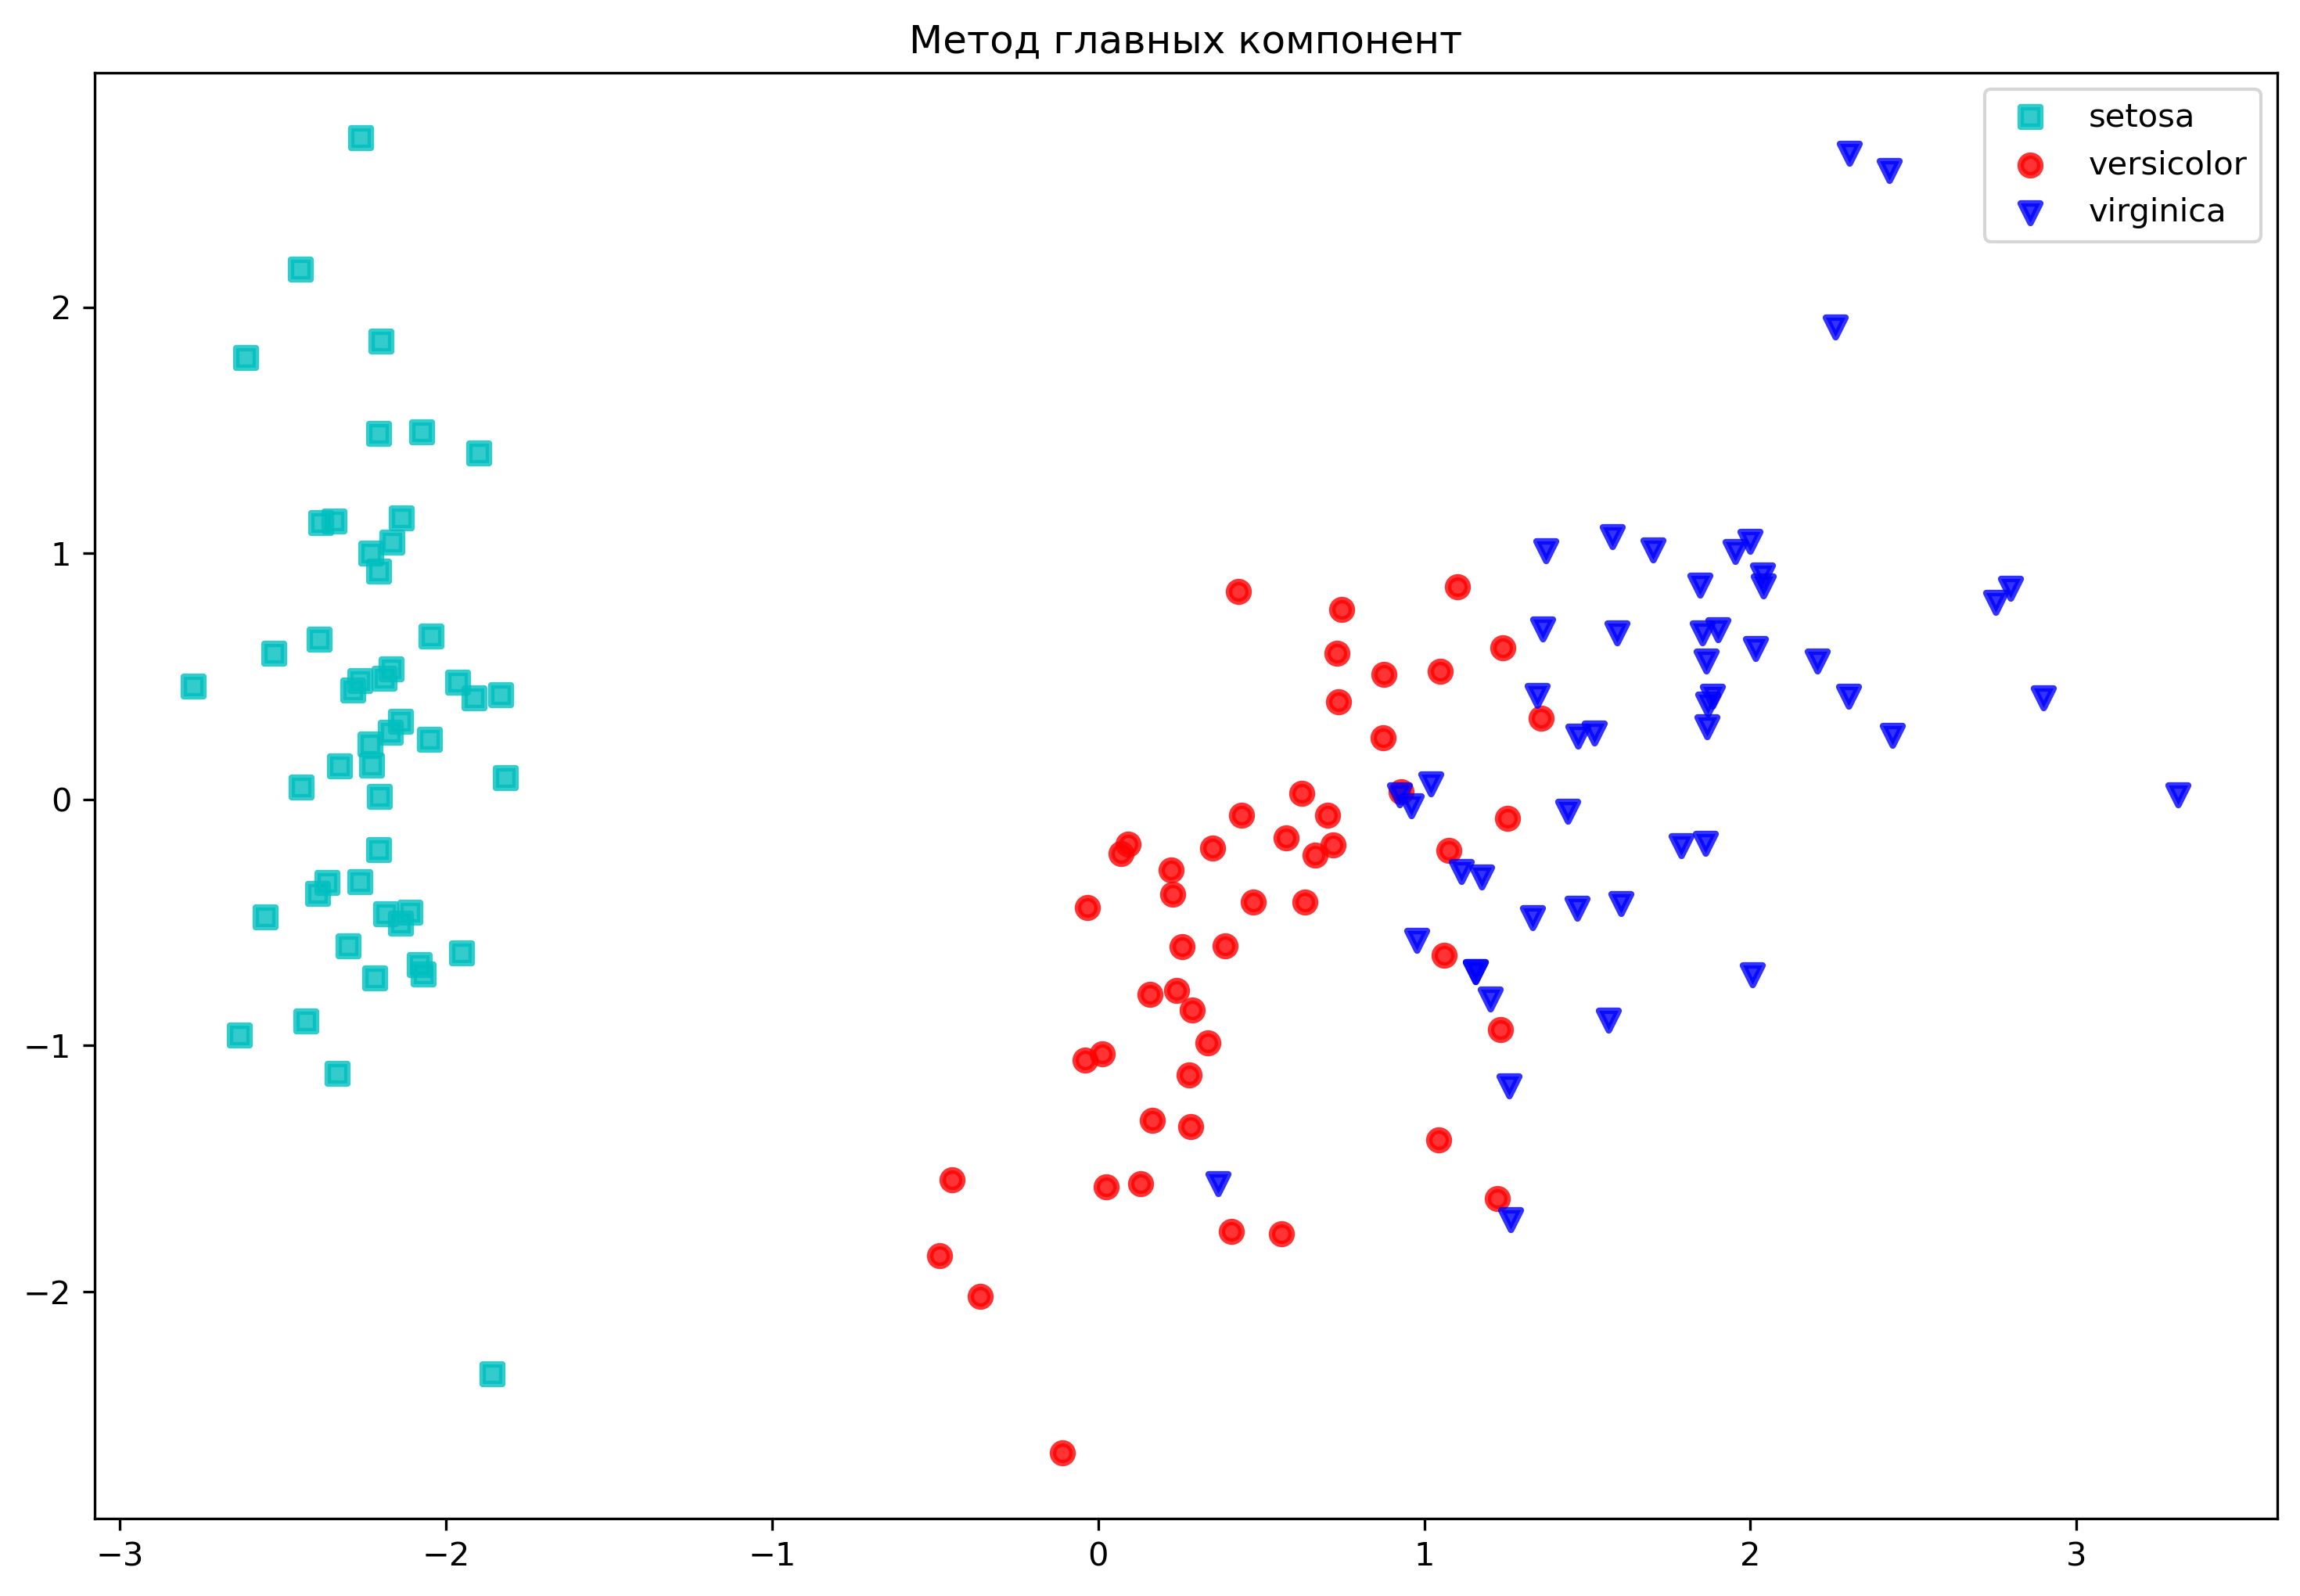

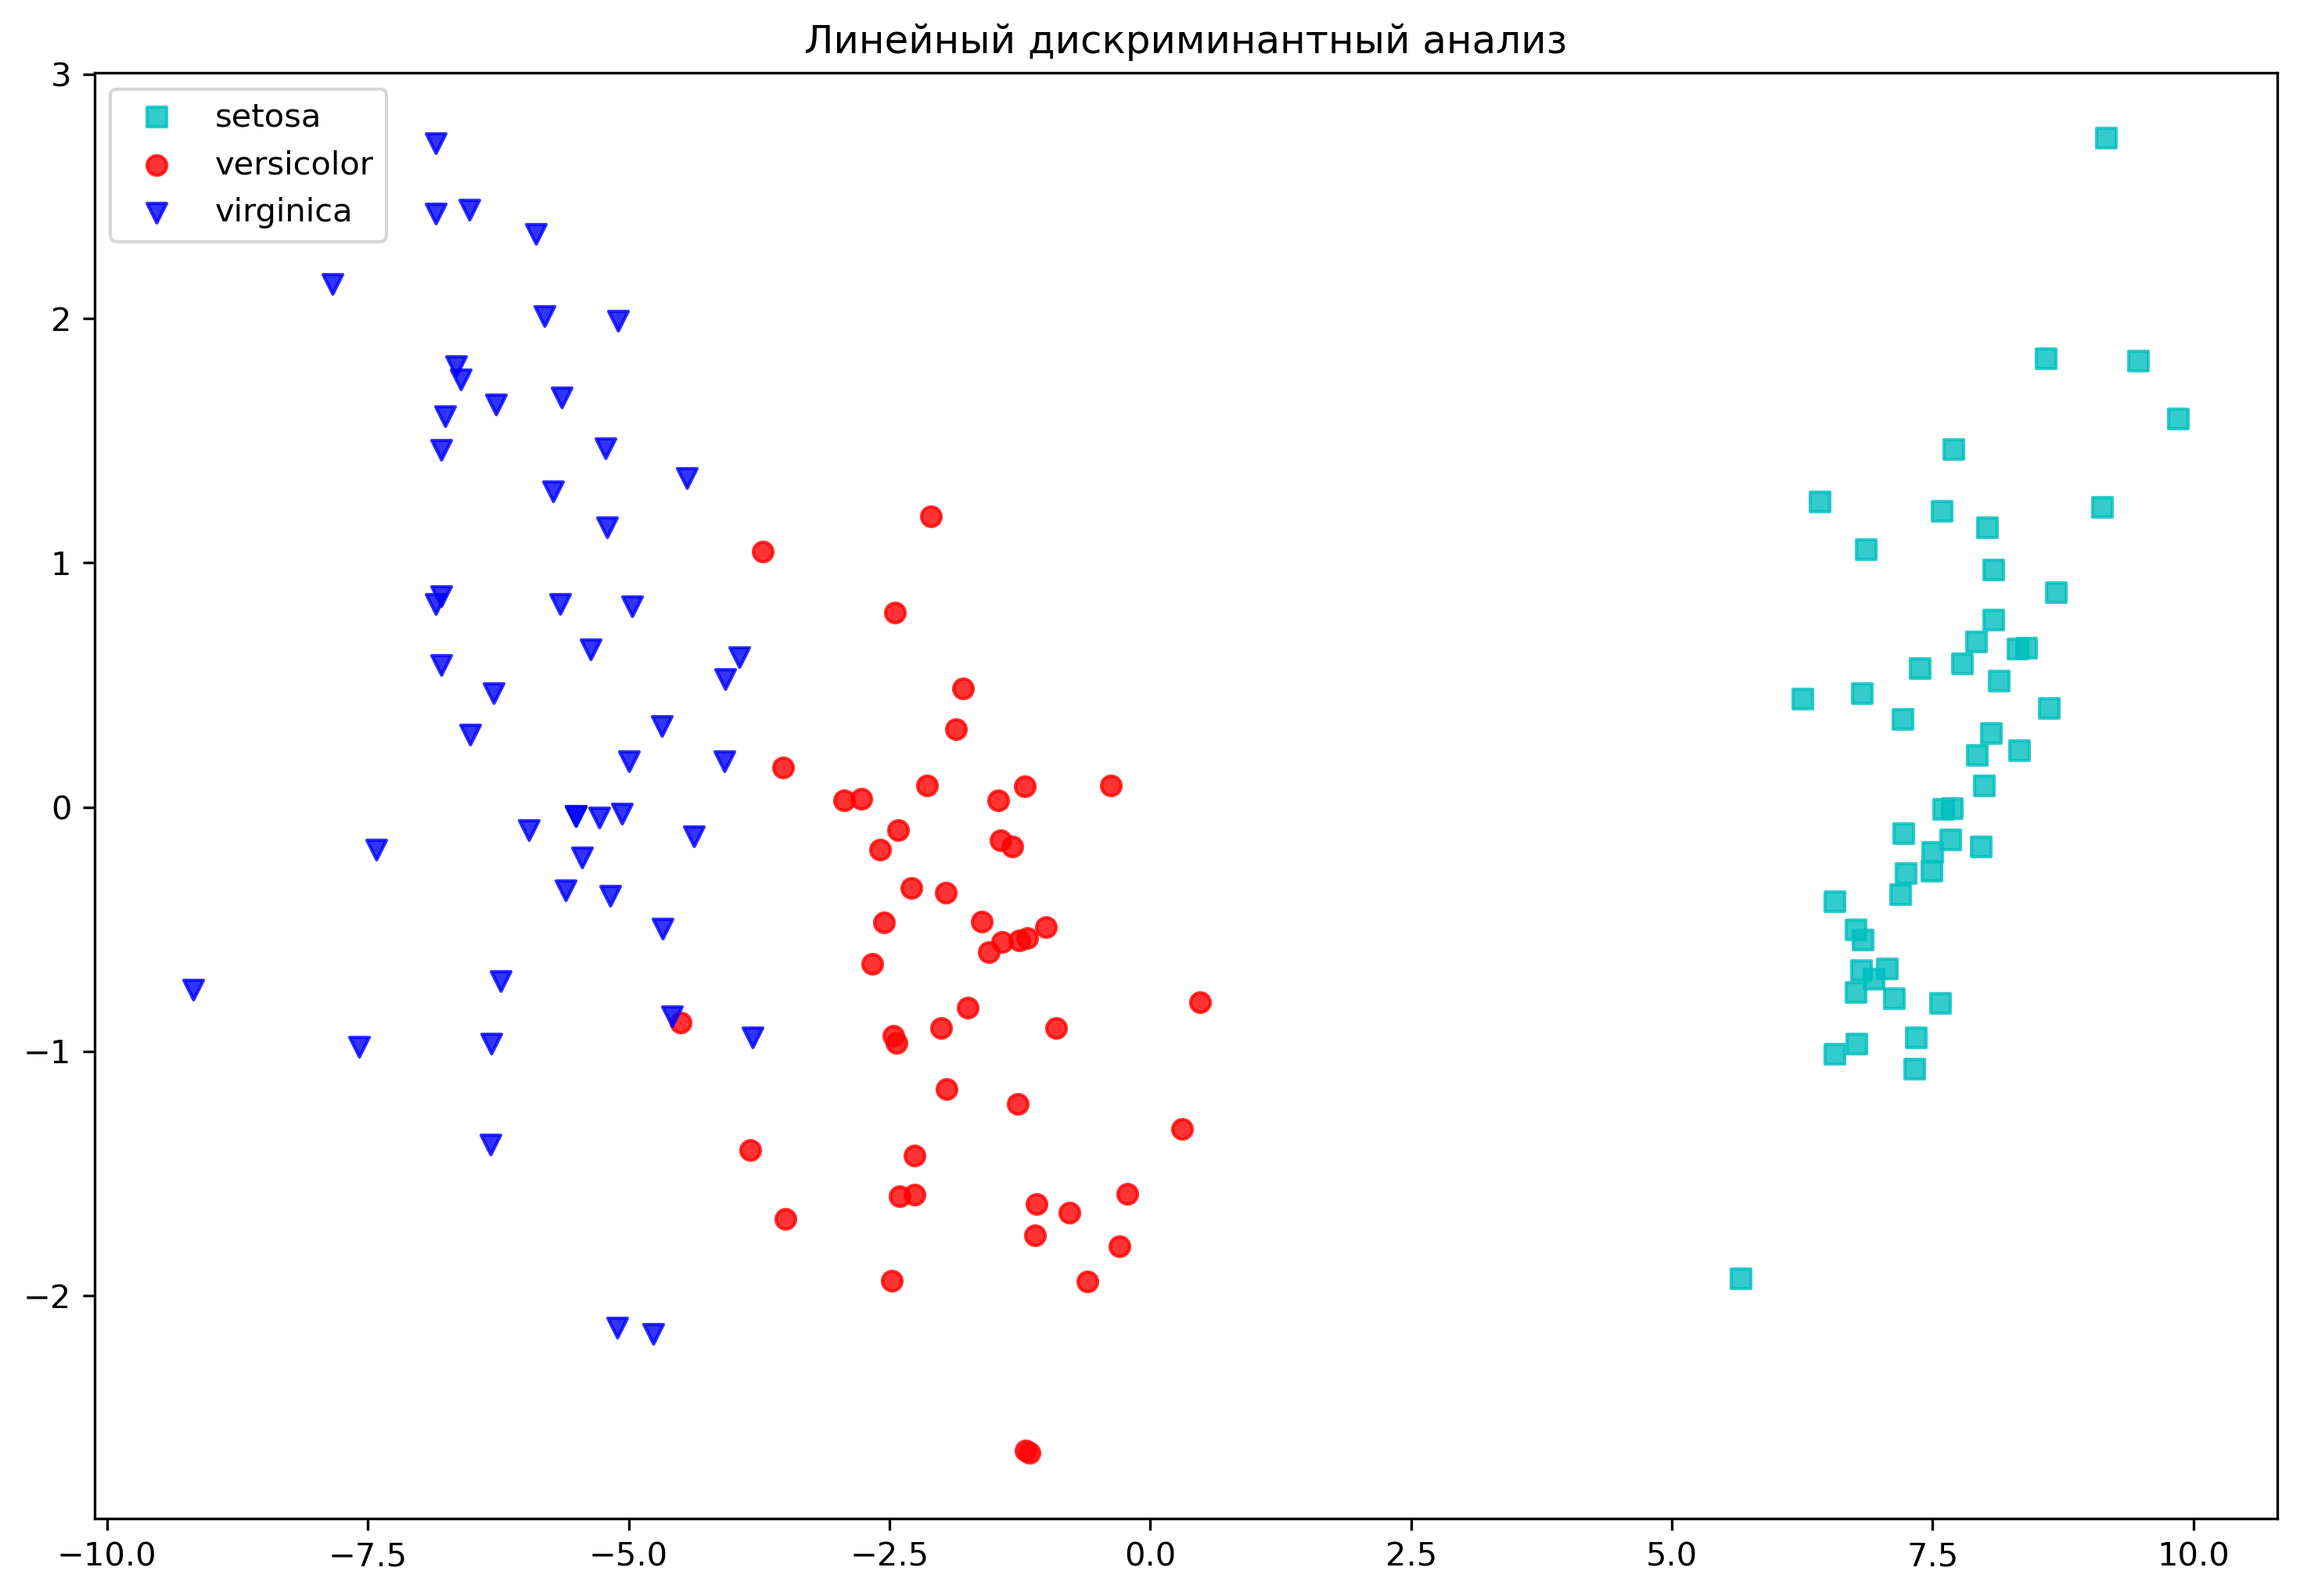

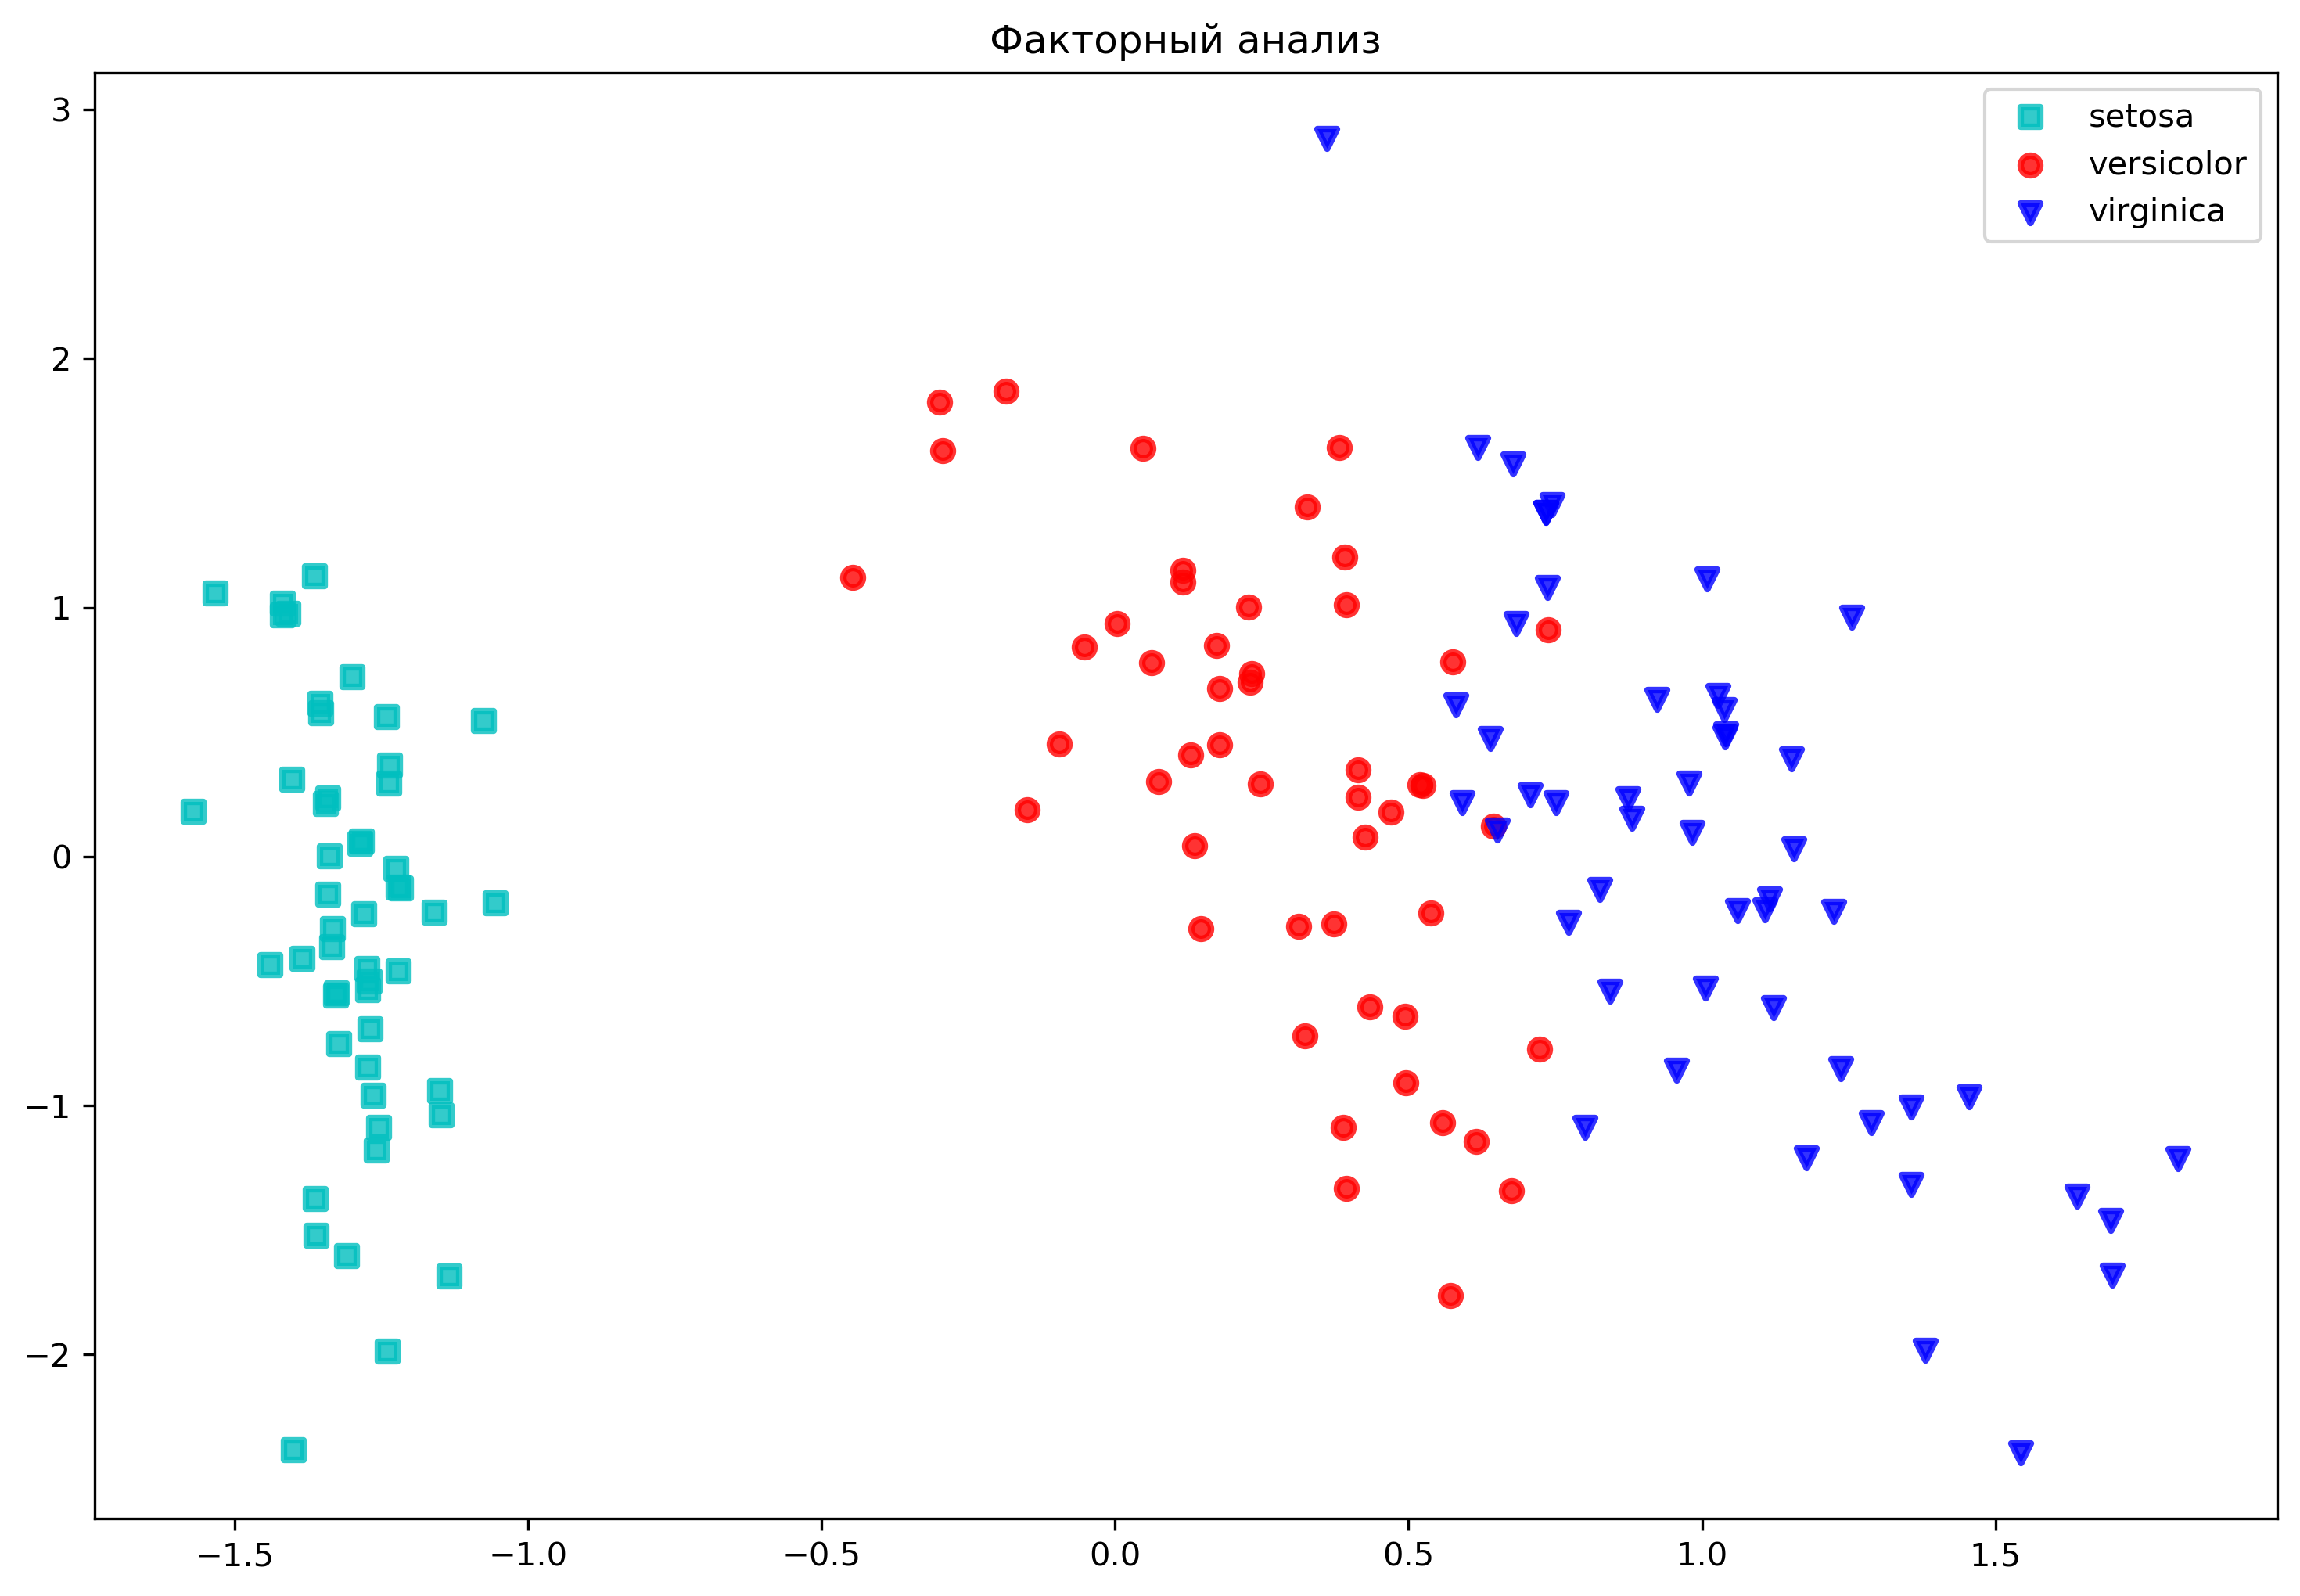

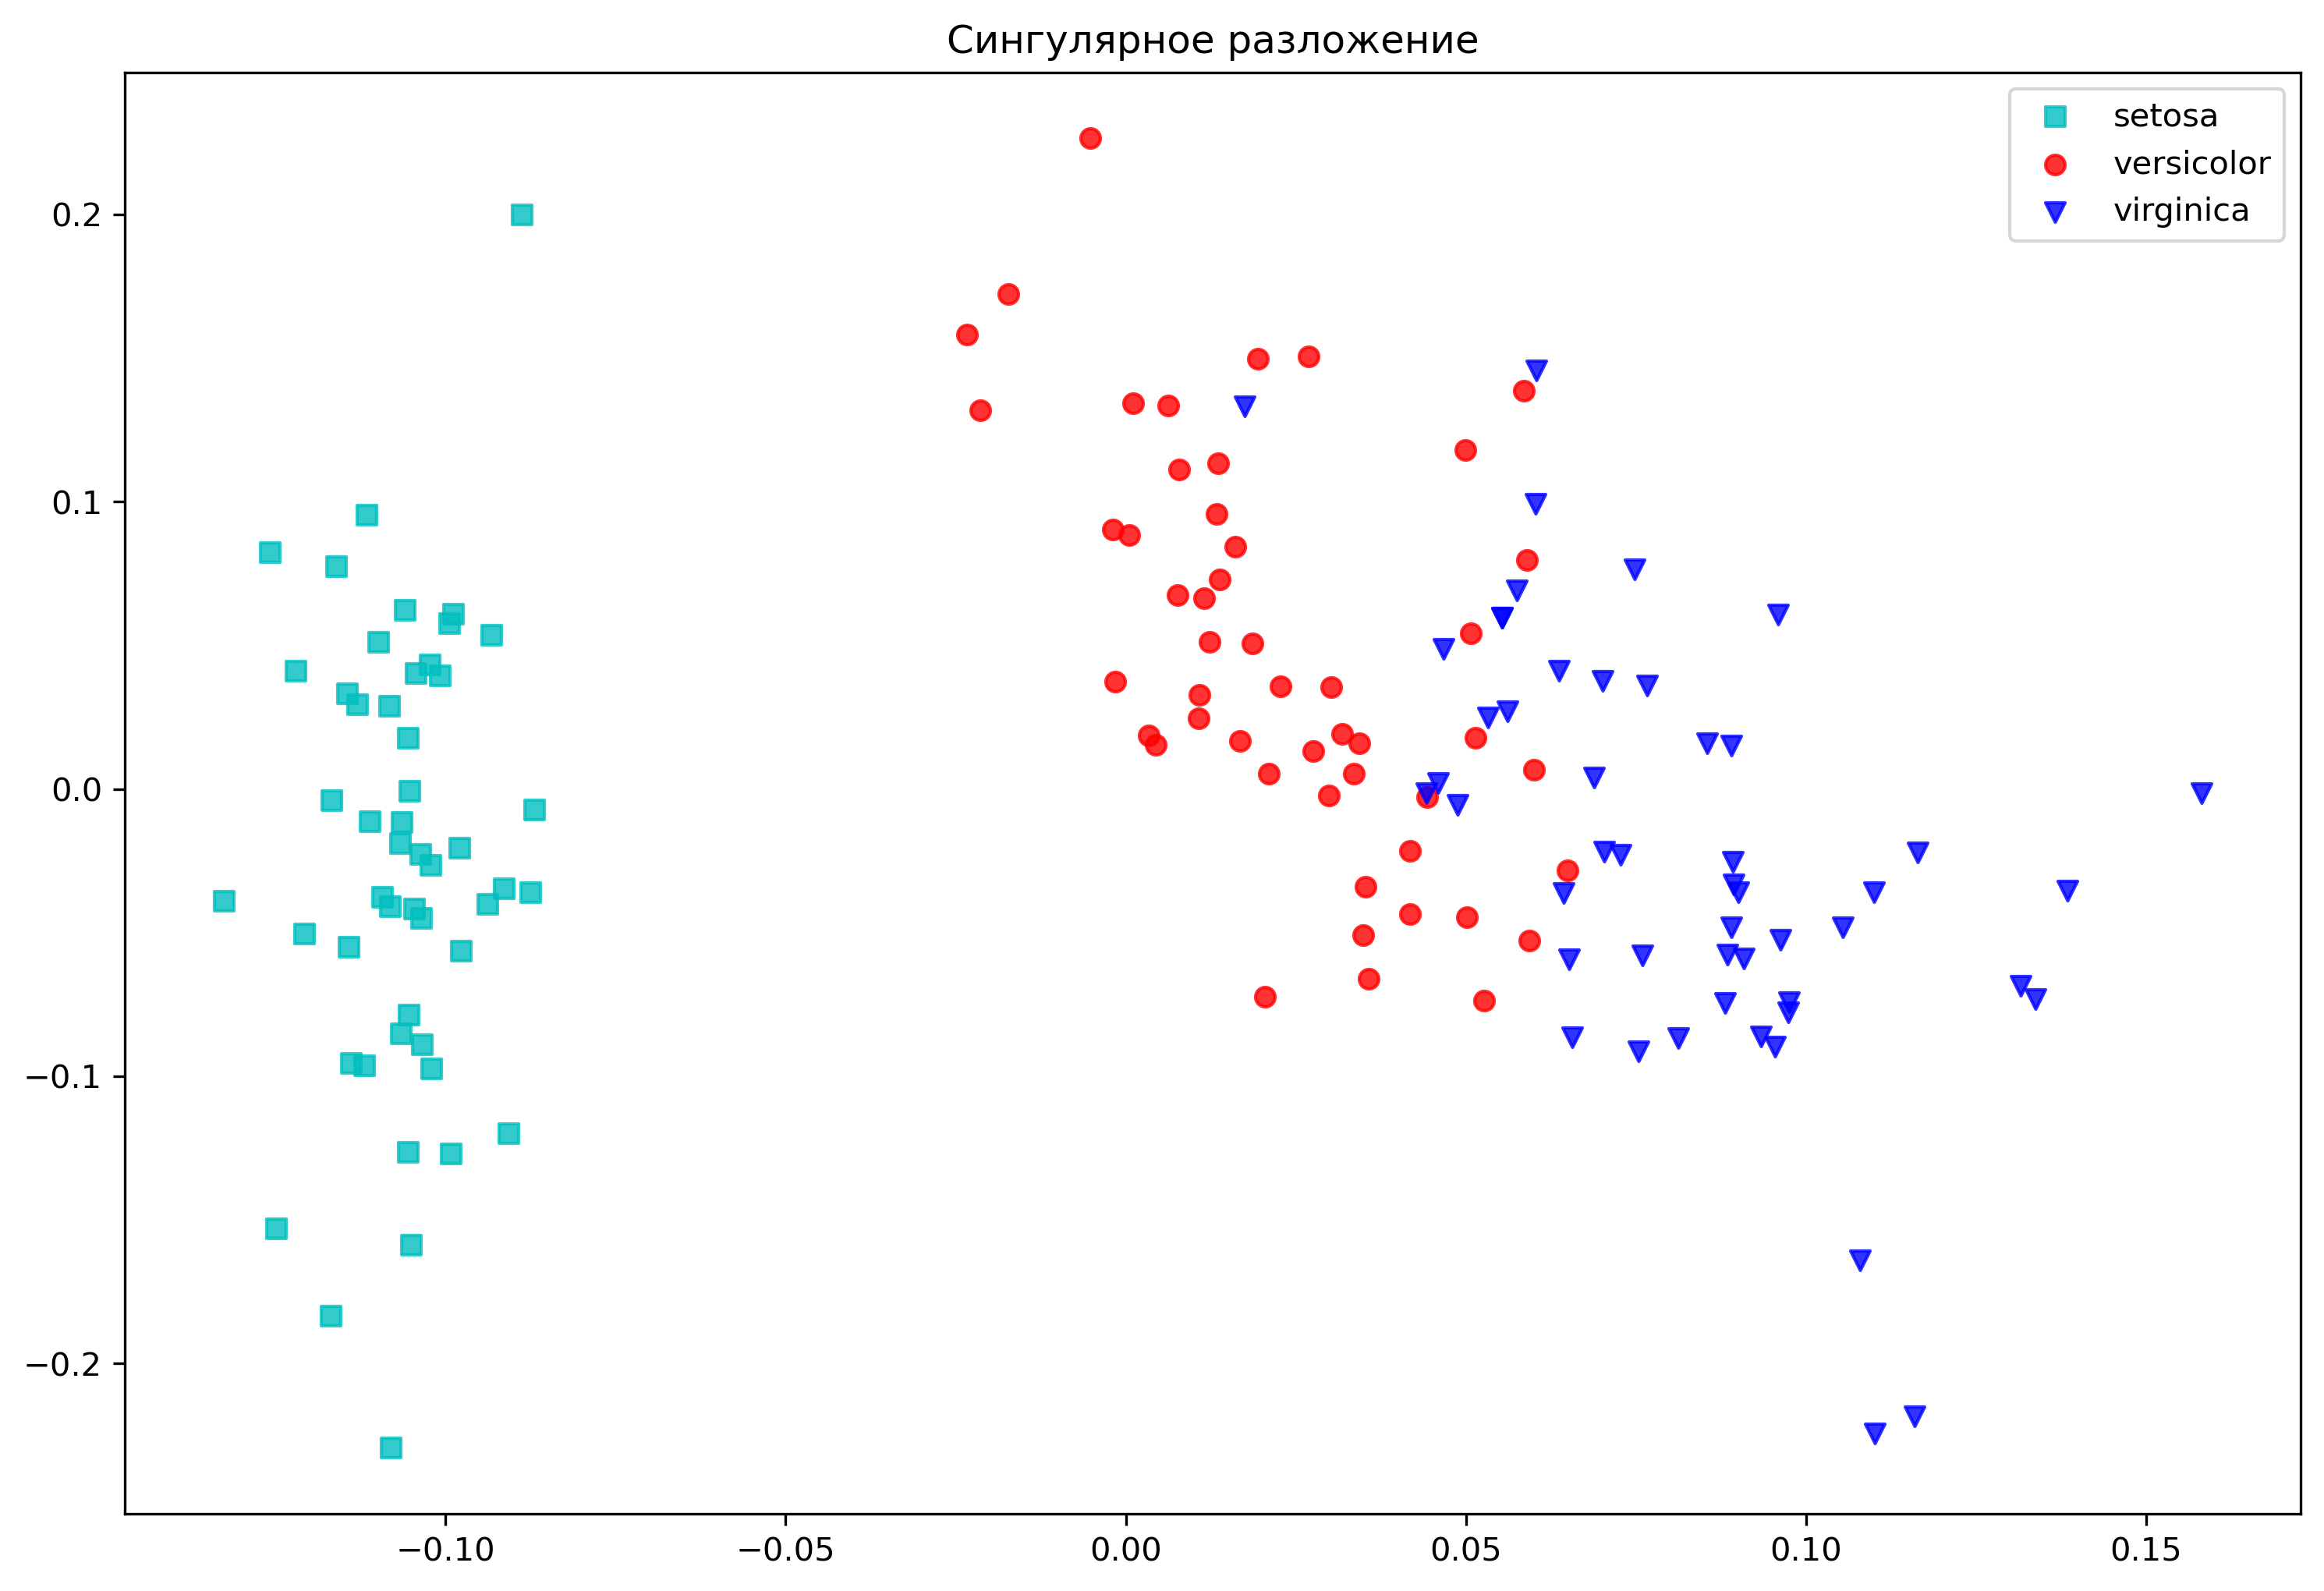

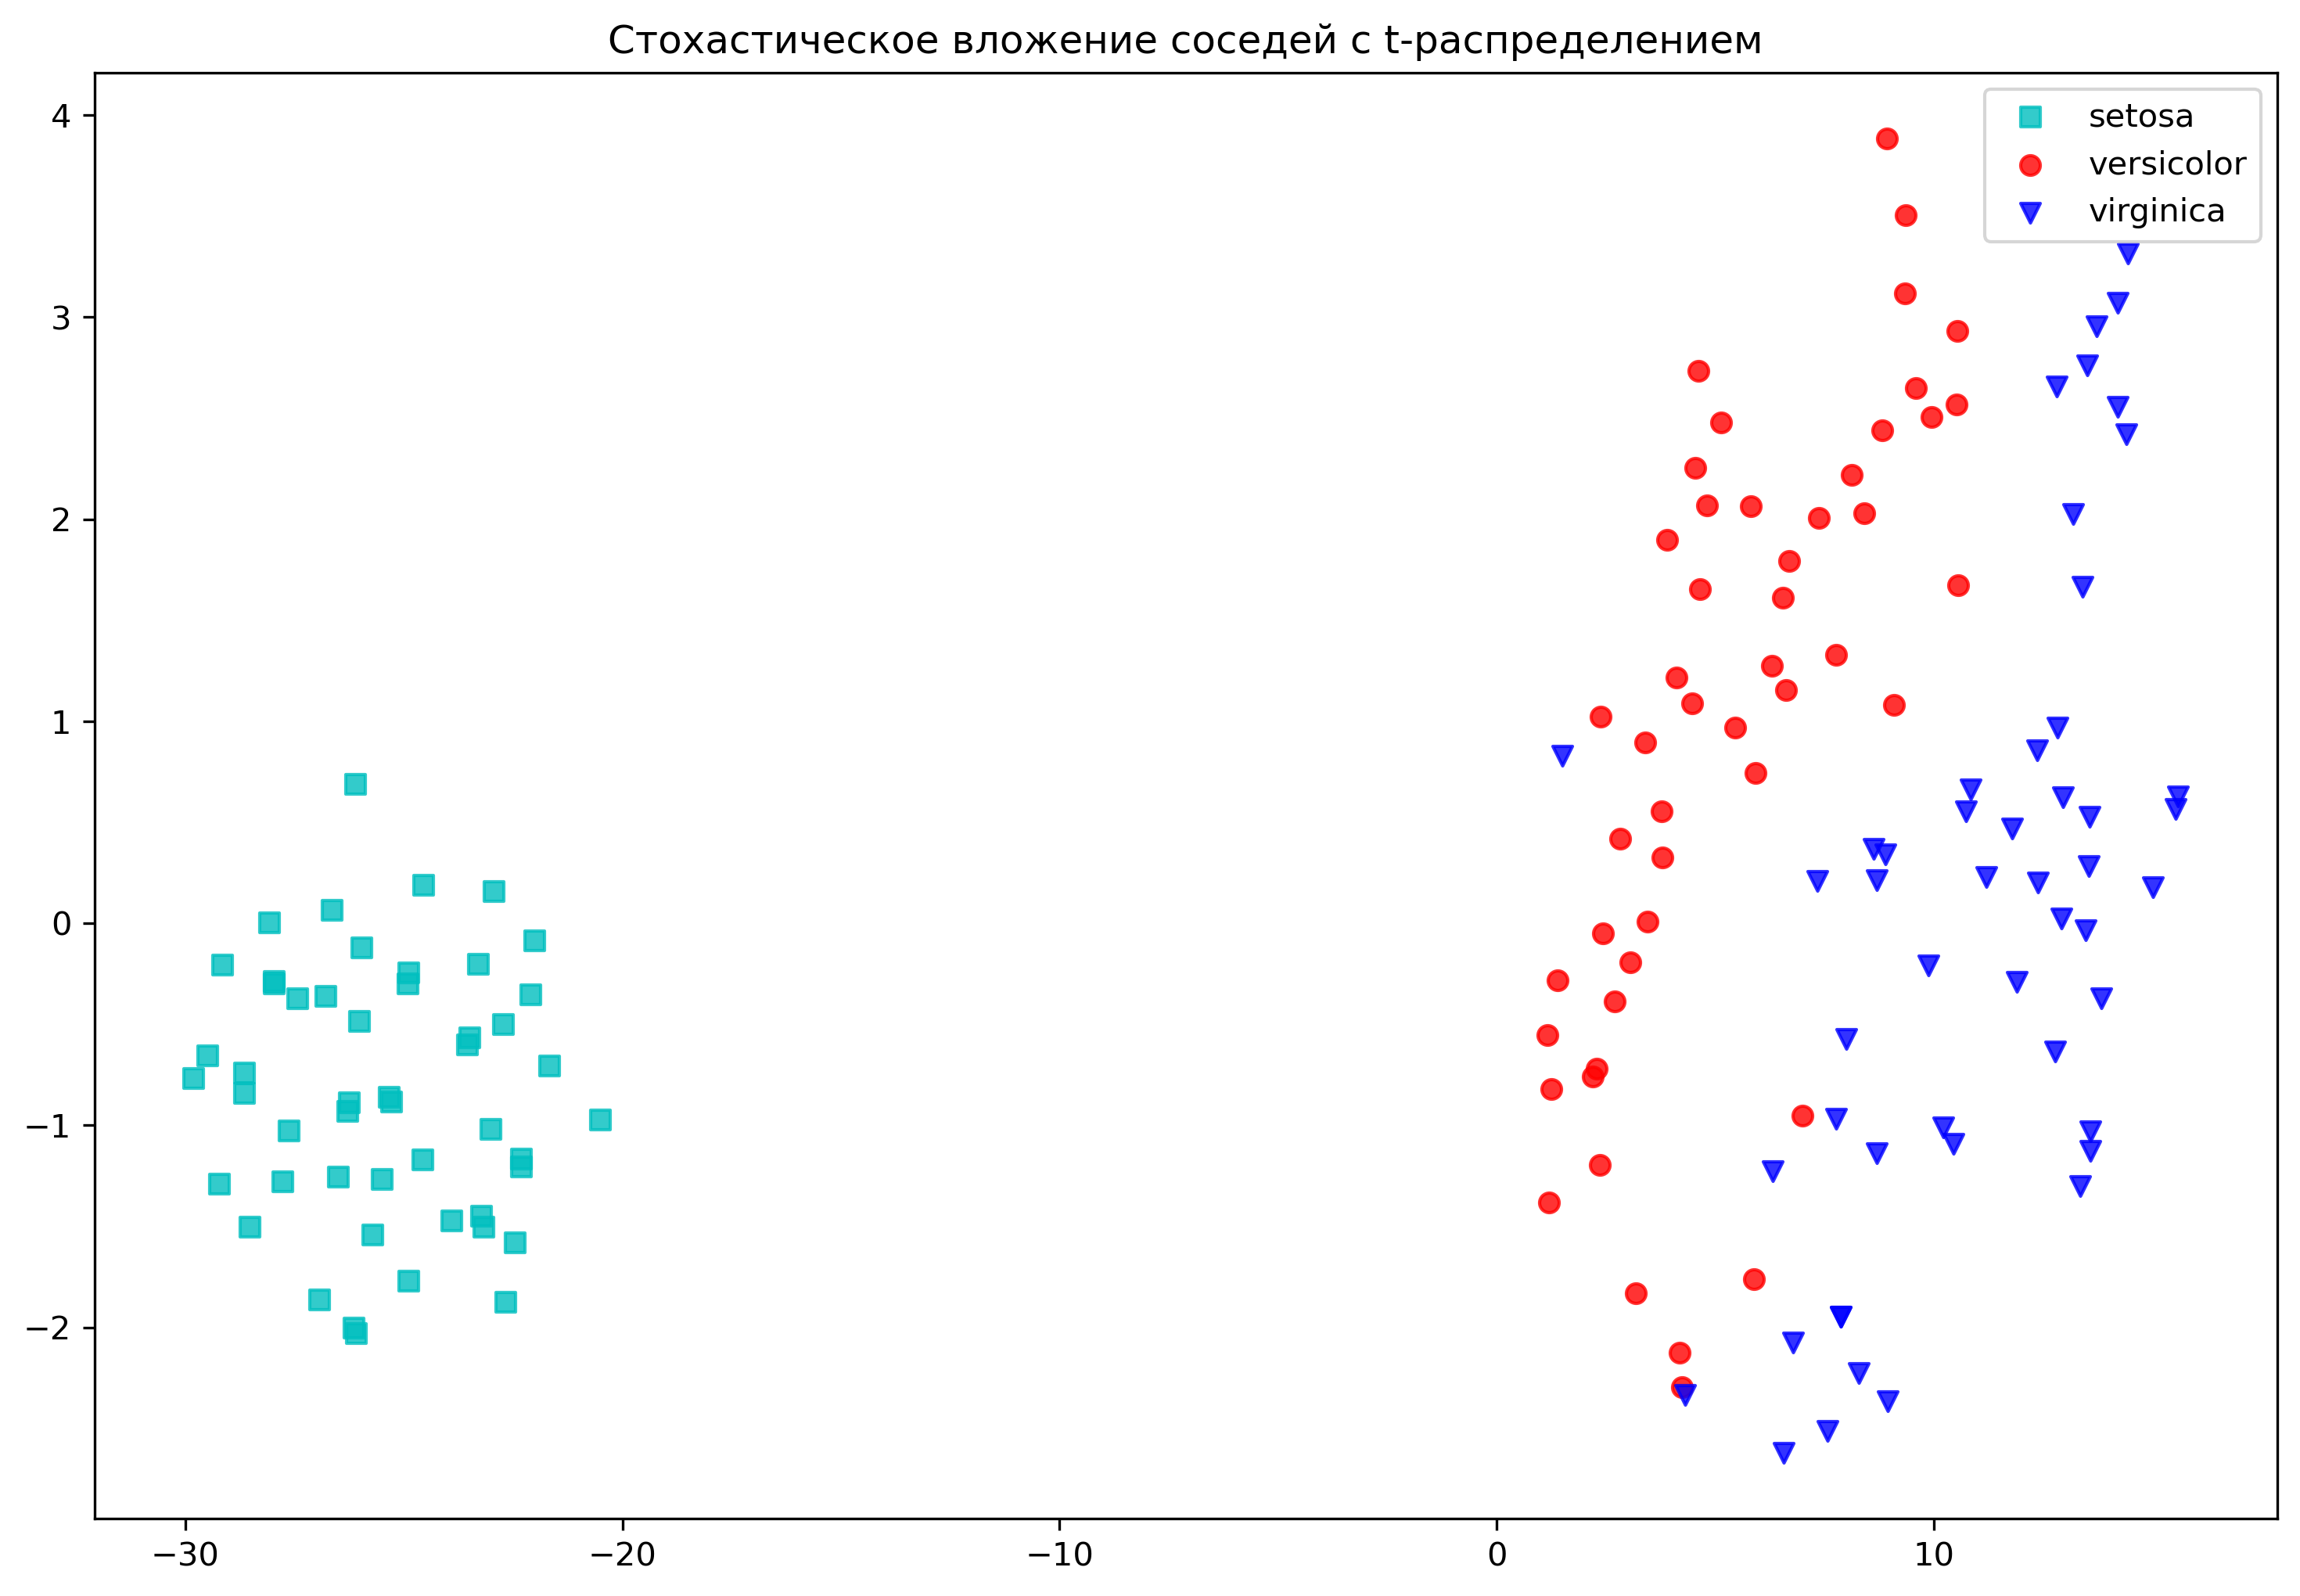

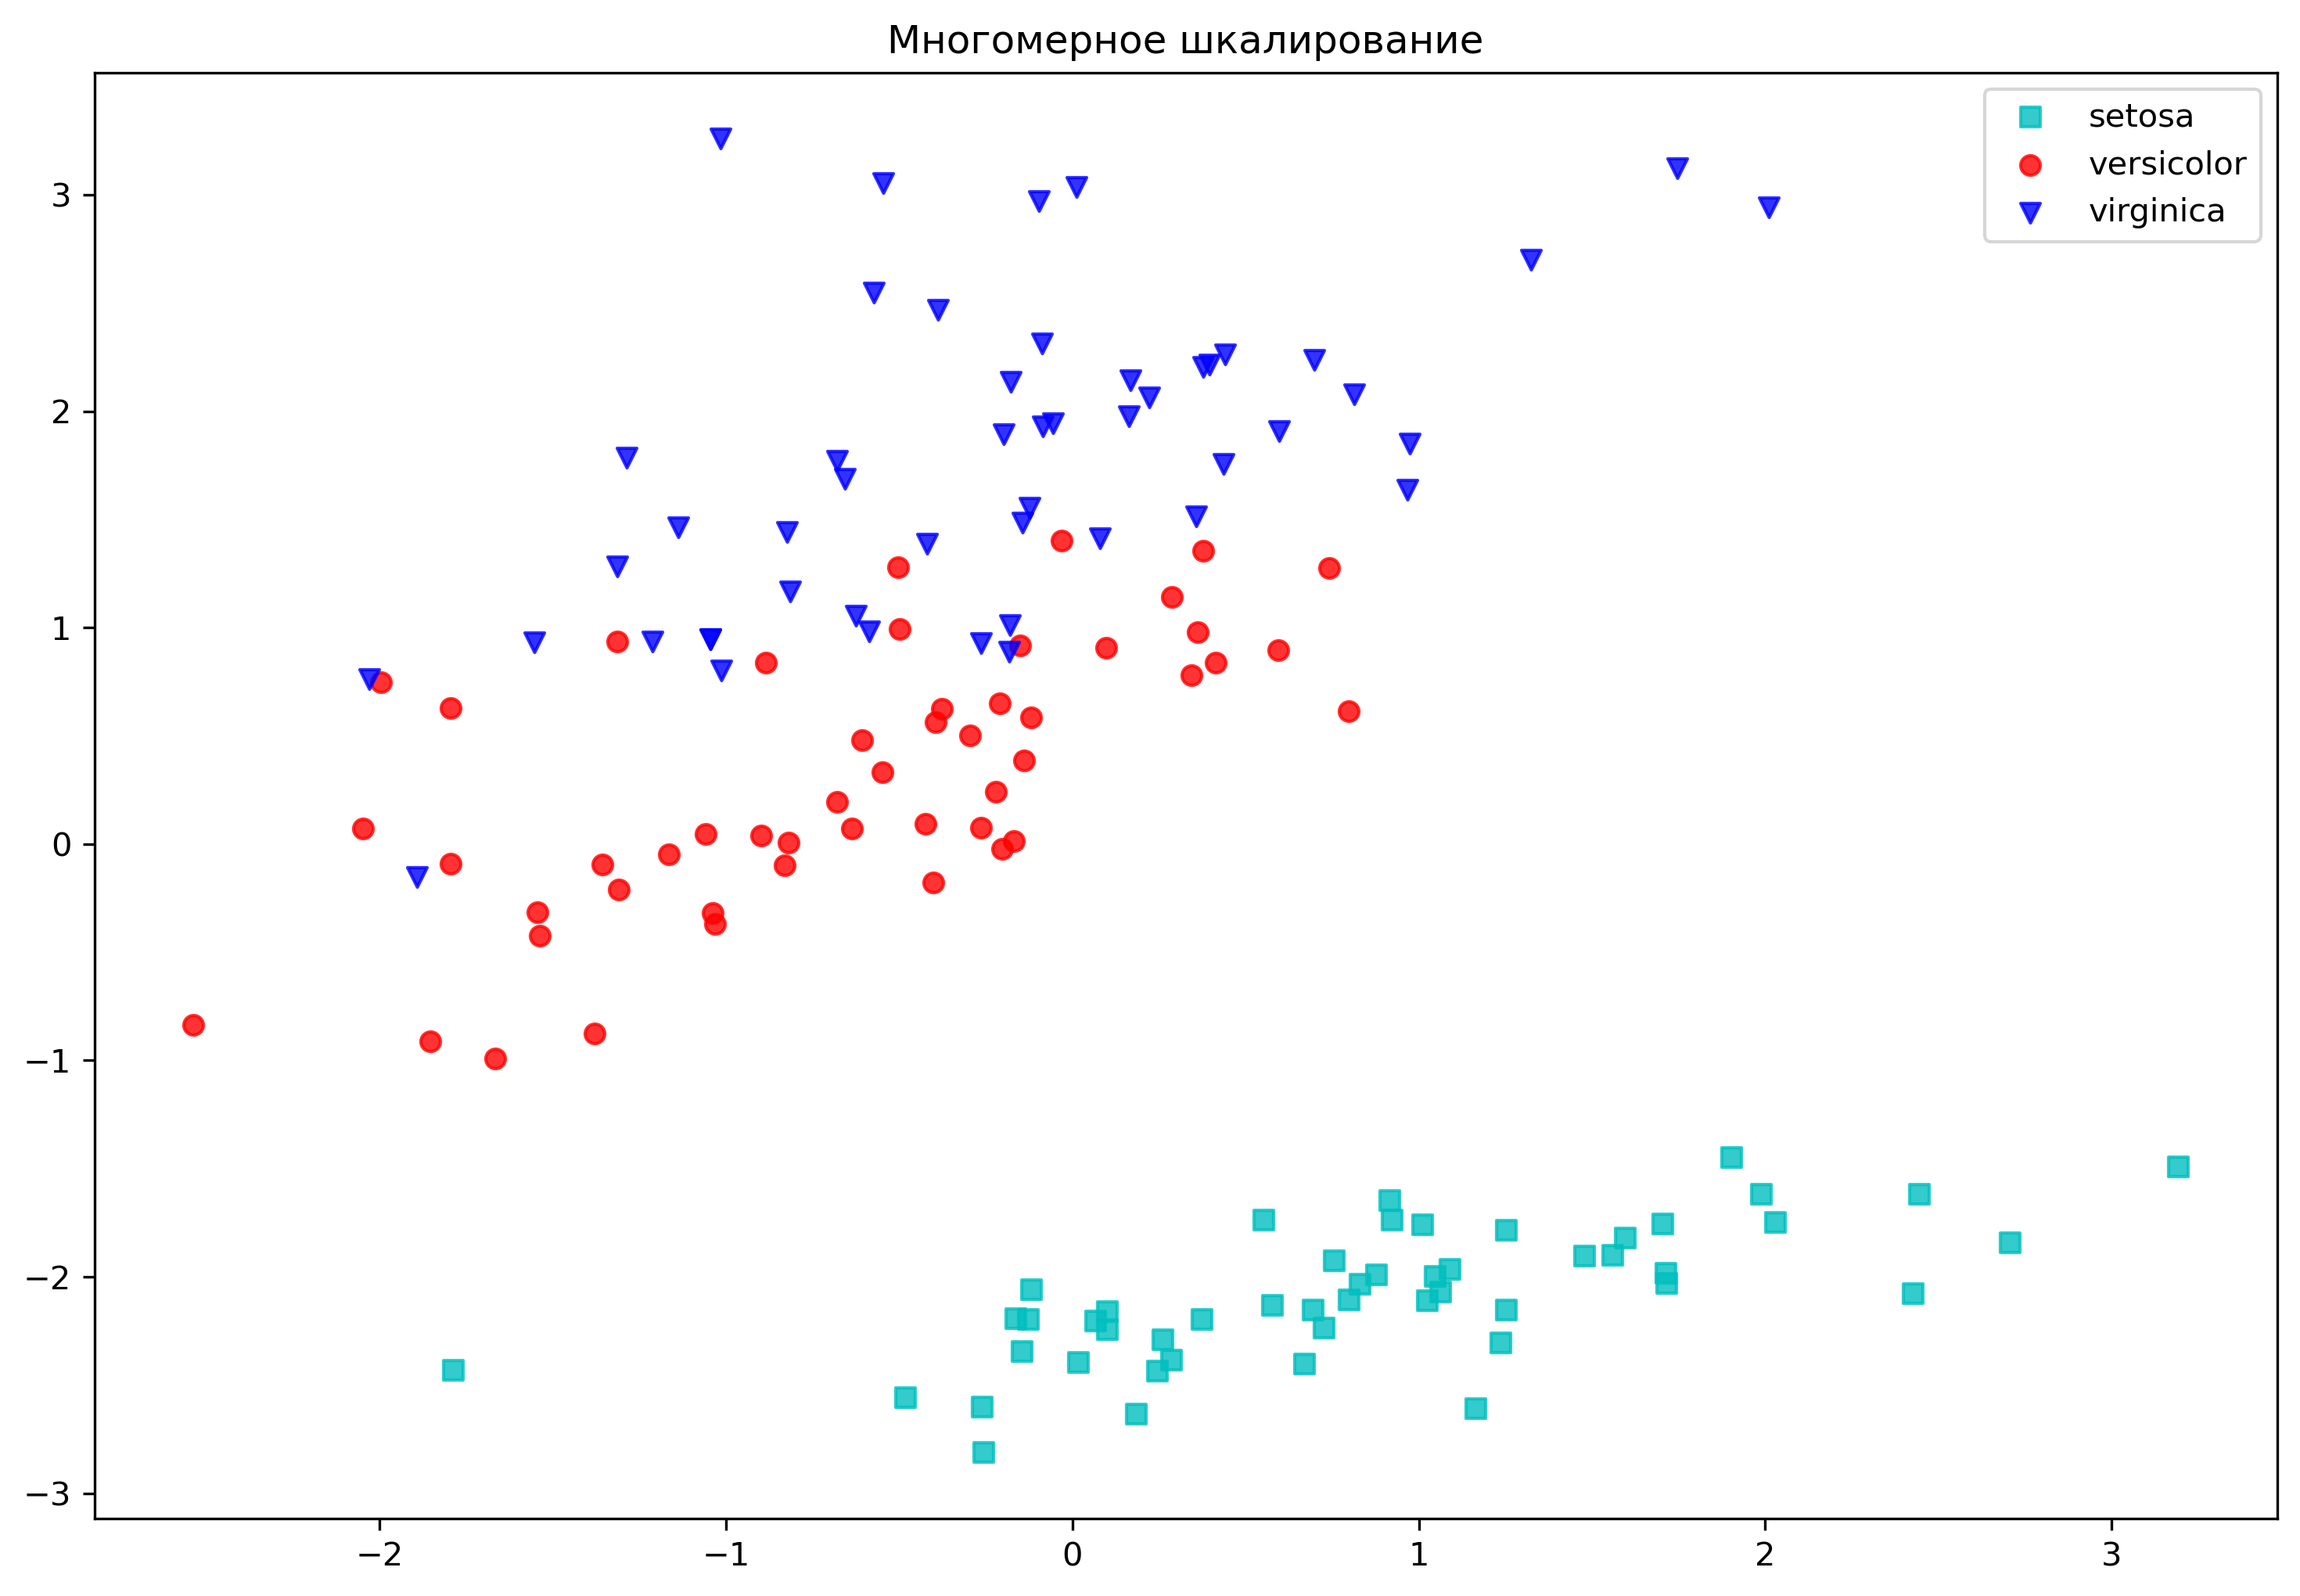

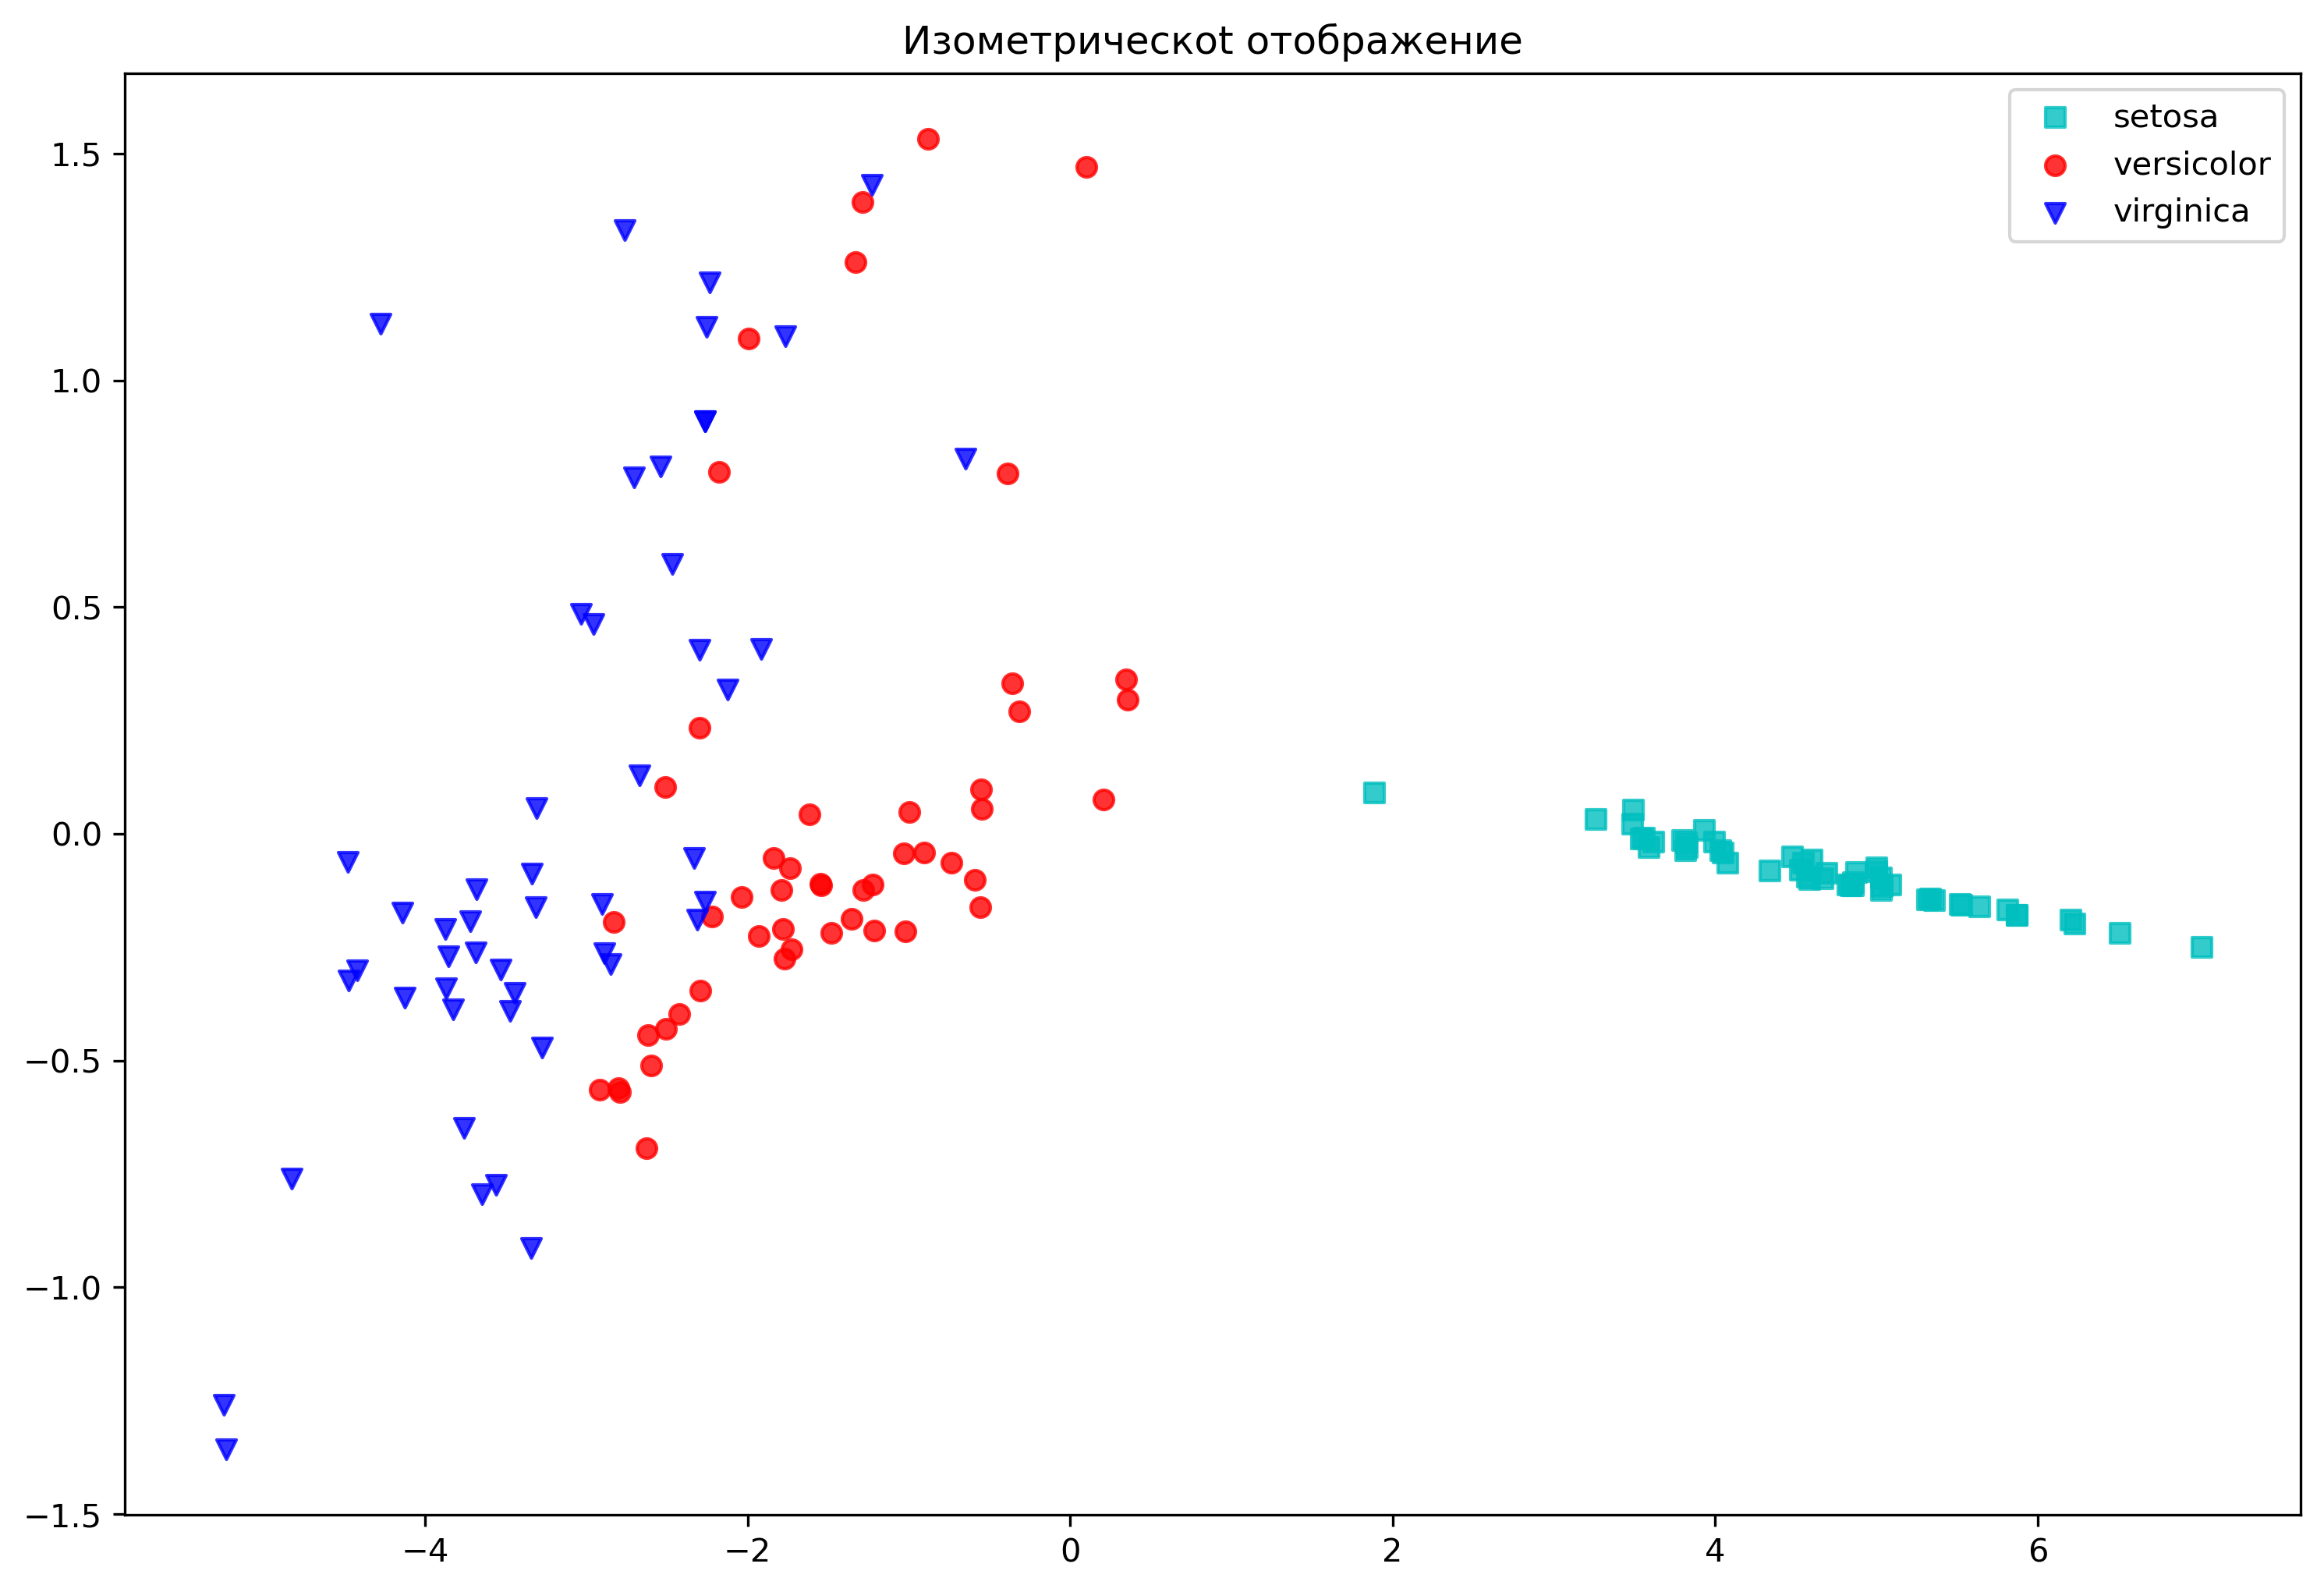

In [3]:
iris = datasets.load_iris()  
X = iris.data 
y = iris.target 
target_names = iris.target_names  # стандартизируем входные данные 
std_scaler = StandardScaler() 
X = std_scaler.fit_transform(X, y)  
markers = [ "," , "o" , "v"] 
colors = ["c", "r", "b"] 
lw = 2  
# инициализируем класс для Метода главных компонент, указываем количество компонент для анализа 
pca = PCA(n_components=2) 
X_r = pca.fit(X).transform(X)  
# инициализируем класс для Линейного дискриминантного анализа, указываем количество компонент для анализа 
lda = LinearDiscriminantAnalysis(n_components=2) 
X_r2 = lda.fit(X, y).transform(X)  
# инициализируем класс для Факторного анализа, указываем количество компонент для анализа 
fa = FactorAnalysis(n_components=2) 
X_r3 = fa.fit_transform(X, y)  
# вычисляем сингулярное разложение 
U, S, Vt = np.linalg.svd(X)  
# инициализируем класс для Стохастического вложения соседей с t-распределением 
tsne = TSNE(n_components=2, init='pca', random_state=0) 
X_tsne = tsne.fit_transform(X)  
# инициализируем класс для Многомерного шкалирования 
mds = MDS(n_components=2, n_init=1, max_iter=100) 
X_mds = mds.fit_transform(X)  
# инициализируем класс для Изометрического отображения 
iso = Isomap(n_neighbors=10, n_components=2) 
X_iso = iso.fit_transform(X)   
plt.figure(figsize=(8,6), dpi=300) 
for marker, i, target_name, color in zip(markers, [0, 1, 2], target_names, colors):     
    plt.scatter(X[y == i, 0], X[y == i, 1], 
                color=color, marker=marker, 
                alpha=.8, lw=lw,                 
                label=target_name) 
plt.legend(loc='best', shadow=False, scatterpoints=1) 
plt.title('Оригинальные данные')  
plt.figure(figsize=(12,8), dpi=300) 
for marker, i, target_name, color in zip(markers, [0, 1, 2], target_names, colors):     
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, marker=marker, alpha=.8, lw=lw,                 
                label=target_name) 
plt.legend(loc='best', shadow=False, scatterpoints=1) 
plt.title('Метод главных компонент')  
plt.figure(figsize=(12,8), dpi=300) 
for marker, i, target_name, color in zip(markers, [0, 1, 2], target_names, colors):     
        plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color, marker=marker,                 
                    label=target_name) 
plt.legend(loc='best', shadow=False, scatterpoints=1) 
plt.title('Линейный дискриминантный анализ')  
plt.figure(figsize=(12,8), dpi=300) 
for marker, i, target_name, color in zip(markers, [0, 1, 2], target_names, colors):     
    plt.scatter(X_r3[y == i, 0], X_r3[y == i, 1], color=color, marker=marker, alpha=.8, lw=lw,                 
                label=target_name) 
plt.legend(loc='best', shadow=False, scatterpoints=1) 
plt.title('Факторный анализ')  
plt.figure(figsize=(12,8), dpi=300) 
for marker, i, target_name, color in zip(markers, [0, 1, 2], target_names, colors):     
    plt.scatter(U[y == i, 0], U[y == i, 1], alpha=.8, color=color, marker=marker,                 
                label=target_name) 
plt.legend(loc='best', shadow=False, scatterpoints=1) 
plt.title('Сингулярное разложение')  
plt.figure(figsize=(12,8), dpi=300) 
for marker, i, target_name, color in zip(markers, [0, 1, 2], target_names, colors):    
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], alpha=.8, color=color, marker=marker,                 
                label=target_name) 
plt.legend(loc='best', shadow=False, scatterpoints=1) 
plt.title('Стохастическое вложение соседей с t-распределением')  
plt.figure(figsize=(12,8), dpi=300) 
for marker, i, target_name, color in zip(markers, [0, 1, 2], target_names, colors):     
    plt.scatter(X_mds[y == i, 0], X_mds[y == i, 1], alpha=.8, color=color, marker=marker,                 
                label=target_name) 
plt.legend(loc='best', shadow=False, scatterpoints=1) 
plt.title('Многомерное шкалирование')  
plt.figure(figsize=(12,8), dpi=300) 
for marker, i, target_name, color in zip(markers, [0, 1, 2], target_names, colors):     
    plt.scatter(X_iso[y == i, 0], X_iso[y == i, 1], alpha=.8, color=color, marker=marker,                 
                label=target_name) 
plt.legend(loc='best', shadow=False, scatterpoints=1) 
plt.title('Изометрическоt отображение')   
plt.show()